In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/UCI_Credit_Card.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
X=df.drop('default.payment.next.month', axis=1)
X= X.drop('ID', axis=1)
y=df['default.payment.next.month']

In [3]:
from sklearn.model_selection import train_test_split

# First divide train and test data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [26]:
# Then further divide the test set in 50:50 ratio into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=20)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
predictions = dtree.predict(X_val)
dtree.tree_.n_leaves

28

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

score1=accuracy_score(y_val,predictions)
print("Accuracy score: " + str(score1))

Accuracy score: 0.8288888888888889


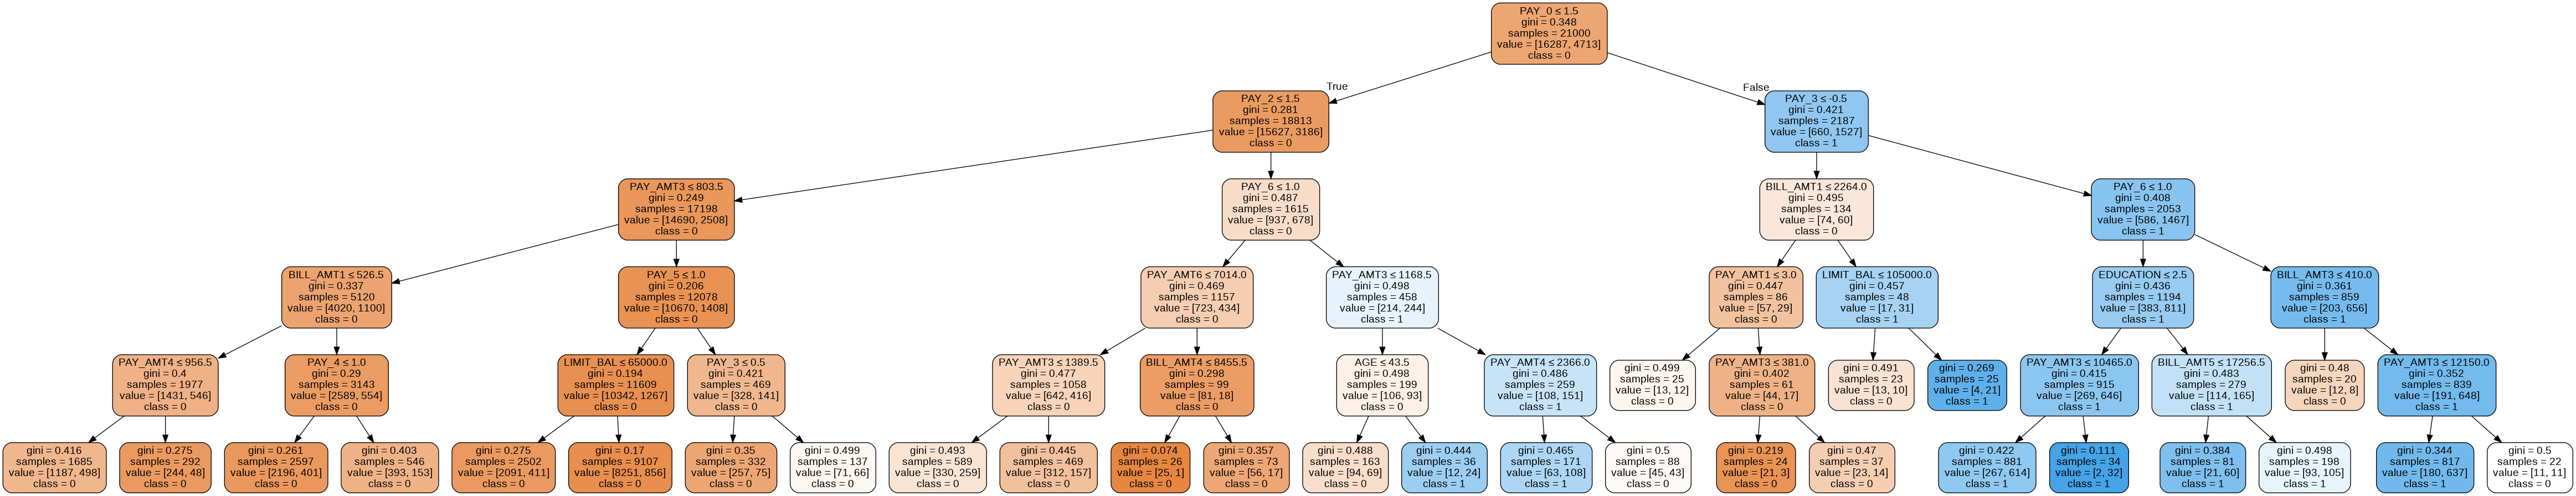

In [36]:
# Tree visualization

from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = X.columns, class_names= ["0", "1"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
from sklearn.tree.export import export_text
tree_rules = export_text(dtree, feature_names=list(X_train))
print(tree_rules)

|--- PAY_0 <= 1.50
|   |--- PAY_2 <= 1.50
|   |   |--- PAY_AMT3 <= 803.50
|   |   |   |--- BILL_AMT1 <= 526.50
|   |   |   |   |--- PAY_AMT4 <= 956.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_AMT4 >  956.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- BILL_AMT1 >  526.50
|   |   |   |   |--- PAY_4 <= 1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_4 >  1.00
|   |   |   |   |   |--- class: 0
|   |   |--- PAY_AMT3 >  803.50
|   |   |   |--- PAY_5 <= 1.00
|   |   |   |   |--- LIMIT_BAL <= 65000.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- LIMIT_BAL >  65000.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- PAY_5 >  1.00
|   |   |   |   |--- PAY_3 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PAY_3 >  0.50
|   |   |   |   |   |--- class: 0
|   |--- PAY_2 >  1.50
|   |   |--- PAY_6 <= 1.00
|   |   |   |--- PAY_AMT6 <= 7014.00
|   |   |   |   |--- PAY_AMT3 <= 1389.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |-

In [ ]:
def print_decision_tree(tree, feature_names, offset_unit='    '):    
  left      = tree.tree_.children_left
  right     = tree.tree_.children_right
  threshold = tree.tree_.threshold
  value = tree.tree_.value
  if feature_names is None:
      features  = ['f%d'%i for i in tree.tree_.feature]
  else:
      features  = [feature_names[i] for i in tree.tree_.feature]        

  def recurse(left, right, threshold, features, node, depth=0):
          offset = offset_unit*depth
          if (threshold[node] != -2):
                  print(offset+"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                  if left[node] != -1:
                          recurse (left, right, threshold, features,left[node],depth+1)
                  print(offset+"} else {")
                  if right[node] != -1:
                          recurse (left, right, threshold, features,right[node],depth+1)
                  print(offset+"}")
          else:
                  #print(offset,value[node]) 

                  #To remove values from node
                  temp=str(value[node])
                  mid=len(temp)//2
                  tempx=[]
                  tempy=[]
                  cnt=0
                  for i in temp:
                      if cnt<=mid:
                          tempx.append(i)
                          cnt+=1
                      else:
                          tempy.append(i)
                          cnt+=1
                  val_yes=[]
                  val_no=[]
                  res=[]
                  for j in tempx:
                      if j=="[" or j=="]" or j=="." or j==" ":
                          res.append(j)
                      else:
                          val_no.append(j)
                  for j in tempy:
                      if j=="[" or j=="]" or j=="." or j==" ":
                          res.append(j)
                      else:
                          val_yes.append(j)
                  val_yes = int("".join(map(str, val_yes)))
                  val_no = int("".join(map(str, val_no)))

                  if val_yes>val_no:
                      print(offset,'\033[1m',"YES")
                      print('\033[0m')
                  elif val_no>val_yes:
                      print(offset,'\033[1m',"NO")
                      print('\033[0m')
                  else:
                      print(offset,'\033[1m',"Tie")
                      print('\033[0m')

  recurse(left, right, threshold, features, 0,0)

print_decision_tree(dtree, X.columns)

if ( PAY_0 <= 1.5 ) {
    if ( PAY_2 <= 1.5 ) {
        if ( PAY_AMT3 <= 606.5 ) {
            if ( PAY_0 <= 0.5 ) {
                if ( PAY_4 <= 1.0 ) {
                      NO

                } else {
                      NO

                }
            } else {
                if ( AGE <= 54.5 ) {
                      NO

                } else {
                      YES

                }
            }
        } else {
            if ( PAY_4 <= 1.0 ) {
                if ( LIMIT_BAL <= 75000.0 ) {
                      NO

                } else {
                      NO

                }
            } else {
                if ( PAY_AMT2 <= 2529.5 ) {
                      YES

                } else {
                      NO

                }
            }
        }
    } else {
        if ( PAY_5 <= 1.0 ) {
            if ( PAY_AMT6 <= 9289.0 ) {
                if ( BILL_AMT1 <= 17023.5 ) {
                      NO

                } else {
                      NO


In [57]:
def traverse(left, right, value, threshold, features, node, depth):
  global increment, rules, rule_params
  if (threshold[node] != -2):
    if left[node] != -1:
      rule_params.append("(" + features[node] + " <= " + str(threshold[node])+ ", 'client', eq, 'yes')")
      traverse(left, right, value, threshold, features,left[node],depth+1)
    if right[node] != -1:
      rule_params.append("(" + features[node] + " <= " + str(threshold[node])+ ", 'client', eq, 'no')")
      traverse(left, right, value, threshold, features,right[node],depth+1)
  else:
    #To remove values from node
    temp=str(value[node])
    mid=len(temp)//2
    tempx=[]
    tempy=[]
    cnt=0
    for i in temp:
      if cnt<=mid:
        tempx.append(i)
        cnt+=1
      else:
        tempy.append(i)
        cnt+=1
    val_yes=[]
    val_no=[]
    res=[]
    for j in tempx:
      if j=="[" or j=="]" or j=="." or j==" ":
        res.append(j)
      else:
        val_no.append(j)
    for j in tempy:
      if j=="[" or j=="]" or j=="." or j==" ":
        res.append(j)
      else:
        val_yes.append(j)
    val_yes = int("".join(map(str, val_yes)))
    val_no = int("".join(map(str, val_no)))
    str_no = str(increment)
    if val_yes>val_no:
        rules.append("shell.define_rule(Rule("+str_no+", " + str(rule_params) + ", [('default_payment_next_month', 'client', eq, 'YES')], 1.0))")
    else:
        rules.append("shell.define_rule(Rule("+str_no+", " + str(rule_params) + ", [('default_payment_next_month', 'client', eq, 'NO')], 1.0))")
        rule_params.pop()
    increment += 1

def print_dtree(tree, feature_names):    
  left      = tree.tree_.children_left
  right     = tree.tree_.children_right
  threshold = tree.tree_.threshold
  value = tree.tree_.value
  features  = [feature_names[i] for i in tree.tree_.feature] 
  traverse(left, right, value, threshold, features, 0, 0)
  for rule in rules:
    print(rule)

rules = []
rule_params = []
increment = 1
print_dtree(dtree, X.columns)

shell.define_rule(Rule(1, ["(PAY_0 <= 1.5, 'client', eq, 'yes')", "(PAY_2 <= 1.5, 'client', eq, 'yes')", "(PAY_AMT3 <= 803.5, 'client', eq, 'yes')", "(BILL_AMT1 <= 526.5, 'client', eq, 'yes')", "(PAY_AMT4 <= 956.5, 'client', eq, 'yes')"], [('default_payment_next_month', 'client', eq, 'NO')], 1.0))
shell.define_rule(Rule(2, ["(PAY_0 <= 1.5, 'client', eq, 'yes')", "(PAY_2 <= 1.5, 'client', eq, 'yes')", "(PAY_AMT3 <= 803.5, 'client', eq, 'yes')", "(BILL_AMT1 <= 526.5, 'client', eq, 'yes')", "(PAY_AMT4 <= 956.5, 'client', eq, 'no')"], [('default_payment_next_month', 'client', eq, 'NO')], 1.0))
shell.define_rule(Rule(3, ["(PAY_0 <= 1.5, 'client', eq, 'yes')", "(PAY_2 <= 1.5, 'client', eq, 'yes')", "(PAY_AMT3 <= 803.5, 'client', eq, 'yes')", "(BILL_AMT1 <= 526.5, 'client', eq, 'yes')", "(BILL_AMT1 <= 526.5, 'client', eq, 'no')", "(PAY_4 <= 1.0, 'client', eq, 'yes')"], [('default_payment_next_month', 'client', eq, 'NO')], 1.0))
shell.define_rule(Rule(4, ["(PAY_0 <= 1.5, 'client', eq, 'yes')",

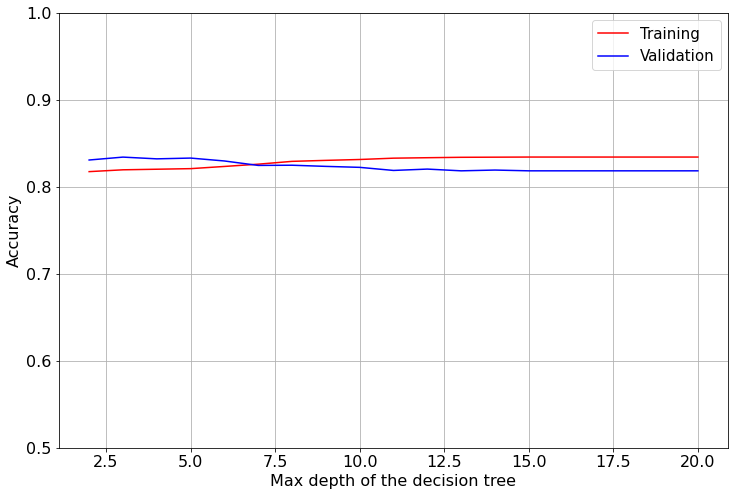

In [14]:
val_acc_max_depth=[]
val_f1_max_depth=[]
train_acc_max_depth=[]
train_f1_max_depth=[]
for i in range(2,21):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_leaf=25)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_max_depth.append(acc_train)
    train_f1_max_depth.append(f1_train)
    val_acc_max_depth.append(acc_val)
    val_f1_max_depth.append(f1_val)

plt.figure(figsize=(12,8))
plt.plot(range(2,21),train_acc_max_depth,c='red')
plt.plot(range(2,21),val_acc_max_depth,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Max depth of the decision tree", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,1.0)
plt.show()

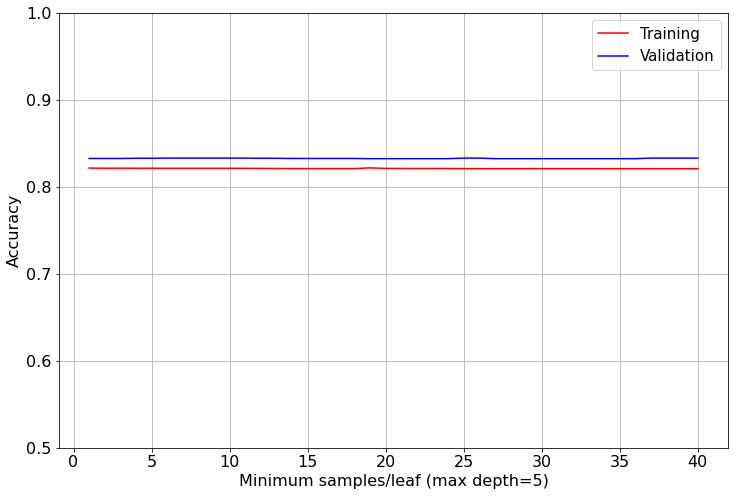

In [15]:
val_acc_min_samples_leaf=[]
val_f1_min_samples_leaf=[]
train_acc_min_samples_leaf=[]
train_f1_min_samples_leaf=[]
for i in range(1,41):
    dtree = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=i)
    dtree.fit(X_train,y_train)
    pred_train = dtree.predict(X_train)
    pred_val = dtree.predict(X_val)
    acc_train=accuracy_score(y_train,pred_train)
    f1_train = f1_score(y_train,pred_train,average='micro')
    acc_val=accuracy_score(y_val,pred_val)
    f1_val = f1_score(y_val,pred_val,average='micro')
    train_acc_min_samples_leaf.append(acc_train)
    train_f1_min_samples_leaf.append(f1_train)
    val_acc_min_samples_leaf.append(acc_val)
    val_f1_min_samples_leaf.append(f1_val)

plt.figure(figsize=(12,8))
plt.plot(range(1,41),train_acc_min_samples_leaf,c='red')
plt.plot(range(1,41),val_acc_min_samples_leaf,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Minimum samples/leaf (max depth=5)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0.5,1.0)
plt.show()